# Réseau de neurones pour classer les appartements

In [2]:
import tensorflow as tf
import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [10]:
housing = fetch_california_housing()
X_train,X_test,y_train,y_test = train_test_split(housing.data,housing.target,test_size=0.2,random_state=42)
print(y_train)

[1.03  3.821 1.726 ... 2.221 2.835 3.25 ]


In [12]:
tf.random.set_seed(42)
norm_layer = keras.layers.Normalization(input_shape = X_train.shape[1:])
model = keras.Sequential(
    [norm_layer,
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(1)]
)
norm_layer.adapt(X_train)
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer,
              loss='mse',
              metrics=['RootMeanSquaredError'])
history = model.fit(X_train,y_train,epochs=30,validation_split=0.2)

Epoch 1/30
413/413 [==============================] - 2s 3ms/step - loss: 0.6801 - root_mean_squared_error: 0.8247 - val_loss: 0.4253 - val_root_mean_squared_error: 0.6521
Epoch 2/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3804 - root_mean_squared_error: 0.6168 - val_loss: 0.3821 - val_root_mean_squared_error: 0.6181
Epoch 3/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3472 - root_mean_squared_error: 0.5893 - val_loss: 0.3621 - val_root_mean_squared_error: 0.6017
Epoch 4/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3341 - root_mean_squared_error: 0.5780 - val_loss: 0.3387 - val_root_mean_squared_error: 0.5819
Epoch 5/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3222 - root_mean_squared_error: 0.5676 - val_loss: 0.3449 - val_root_mean_squared_error: 0.5873
Epoch 6/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3082 - root_mean_squared_error: 0.5551 - val_loss: 0.3343 - val_

In [14]:
y_pred = model.predict(X_test)

129/129 [==============================] - 1s 3ms/step


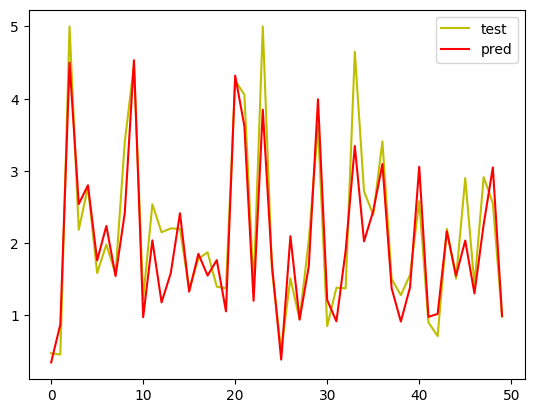

In [18]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(y_test[:50], c="y", label = "test")
plt.plot(y_pred[:50], c="r", label = "pred")
plt.legend()
plt.show()